<a href="https://colab.research.google.com/github/ShaominXu/Image-and-video-processing-labs/blob/main/2D%20Convolution%20and%20Image%20Noise%20Removal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CA02
NetID: sx2311

Name: Shaomin Xu


In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

## Problem 1

### Function `conv2`

In [2]:
def conv2(image, kernel):
    # Get dimensions of the input image and kernel
    image_height, image_width = image.shape
    kernel_height, kernel_width = kernel.shape

    # Calculate padding size for "same" padding
    pad_height = kernel_height // 2
    pad_width = kernel_width // 2

    # Initialize the output feature map with zeros
    output = np.zeros_like(image)

    # Pad the input image with zeros
    padded_image = np.pad(image, ((pad_height, pad_height), (pad_width, pad_width)), mode='constant')

    # Perform the convolution
    for i in range(image_height):
        for j in range(image_width):
            # Extract the region of interest (ROI) from the padded image
            roi = padded_image[i:i+kernel_height, j:j+kernel_width]

            # Flip the kernel
            flipped_kernel = np.flipud(np.fliplr(kernel))

            # Perform element-wise multiplication and sum
            output[i, j] = np.sum(roi * flipped_kernel)

    return output

### Function `plot_filtering`

In [3]:
def plot_filtering(input_image, filter_kernel):
    # Perform convolution using the conv2 function
    filtered_image = conv2(input_image, filter_kernel)

    # Compute the FFT size
    fft_size = input_image.shape

    # Compute the FFT of the original image, filter, and filtered image
    fft_input = np.fft.fft2(input_image, fft_size)
    fft_input = np.fft.fftshift(fft_input)
    fft_filter = np.fft.fft2(filter_kernel, fft_size)
    fft_filter = np.fft.fftshift(fft_filter)
    fft_output = np.fft.fft2(filtered_image, fft_size)
    fft_output = np.fft.fftshift(fft_output)

    # Compute the log-magnitude spectrum of each
    log_mag_input = np.log(1 + np.abs(fft_input))
    log_mag_filter = np.log(1 + np.abs(fft_filter))
    log_mag_output = np.log(1 + np.abs(fft_output))

    # Create subplots for original image, filtered image, and log-magnitude spectra
    fig, axes = plt.subplots(2, 3, figsize=(15, 8))
    plt.subplots_adjust(wspace=0.3)

    # Plot original input image
    axes[0, 0].imshow(input_image, cmap='gray')
    axes[0, 0].set_title("Original Image")
    axes[0, 0].axis('off')

    # Plot filtered image
    axes[0, 1].imshow(filtered_image, cmap='gray')
    axes[0, 1].set_title("Filtered Image")
    axes[0, 1].axis('off')

    # Plot log-magnitude spectrum of the original image
    axes[1, 0].imshow(log_mag_input, cmap='gray')
    axes[1, 0].set_title("Log-Magnitude Spectrum (Input)")
    axes[1, 0].axis('off')

    # Plot log-magnitude spectrum of the filter
    axes[1, 1].imshow(log_mag_filter, cmap='gray')
    axes[1, 1].set_title("Log-Magnitude Spectrum (Filter)")
    axes[1, 1].axis('off')

    # Plot log-magnitude spectrum of the filtered image
    axes[1, 2].imshow(log_mag_output, cmap='gray')
    axes[1, 2].set_title("Log-Magnitude Spectrum (Output)")
    axes[1, 2].axis('off')

    # Add colorbars
    cbar1 = fig.colorbar(axes[0, 0].imshow(input_image, cmap='gray'), ax=axes[0, 0], orientation='vertical', shrink=0.7)
    cbar2 = fig.colorbar(axes[0, 1].imshow(filtered_image, cmap='gray'), ax=axes[0, 1], orientation='vertical', shrink=0.7)
    cbar3 = fig.colorbar(axes[1, 0].imshow(log_mag_input, cmap='gray'), ax=axes[1, 0], orientation='vertical', shrink=0.7)
    cbar4 = fig.colorbar(axes[1, 1].imshow(log_mag_filter, cmap='gray'), ax=axes[1, 1], orientation='vertical', shrink=0.7)
    cbar5 = fig.colorbar(axes[1, 2].imshow(log_mag_output, cmap='gray'), ax=axes[1, 2], orientation='vertical', shrink=0.7)

    plt.show()

### Use `plot_filtering` on an image with 3 filters

#### Read image

In [6]:
img = cv2.imread("color image.png", cv2.IMREAD_GRAYSCALE)

#### Filter H1

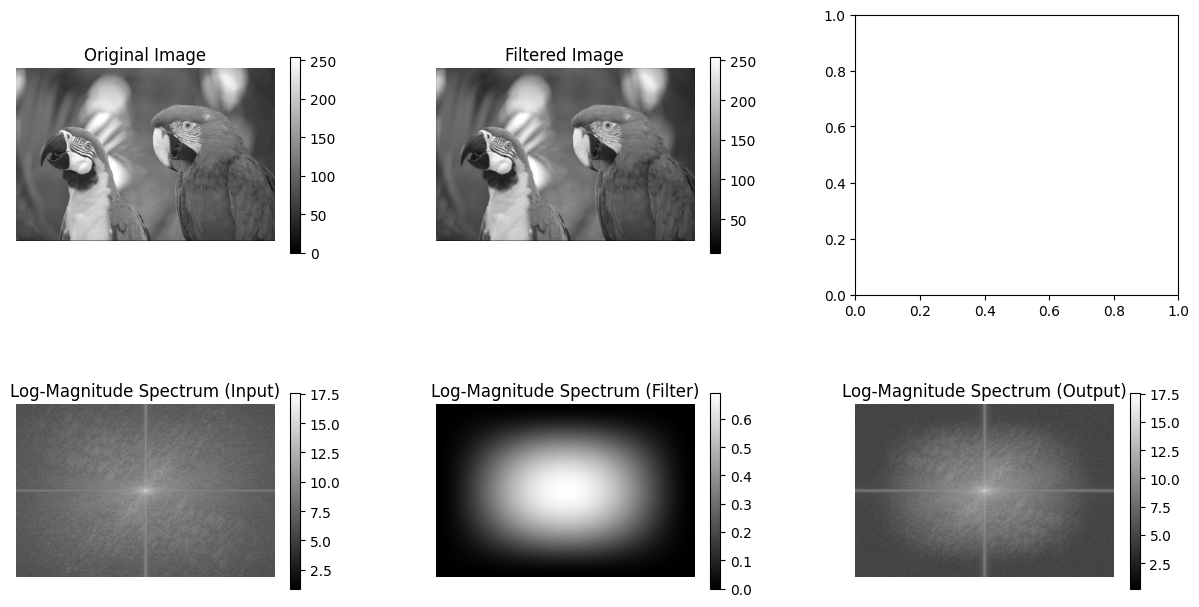

In [7]:
H1 = 1/16 * np.array([[1, 2, 1], [2, 4, 2], [1, 2, 1]])
plot_filtering(img, H1)

Spatial Domain Result: The image becomes smoother and blurrier.

Frequency Domain Result: High-frequency components (edges and details) have been attenuated.

Reason: The filter H1 has a low-pass effect on the image's frequency domain, so this filter can remove noises. Specifically, H1 is a Gaussian filter, which is often used for blurring and smoothing. Applying this filter will have a smoothing effect on the image.

#### Filter H2

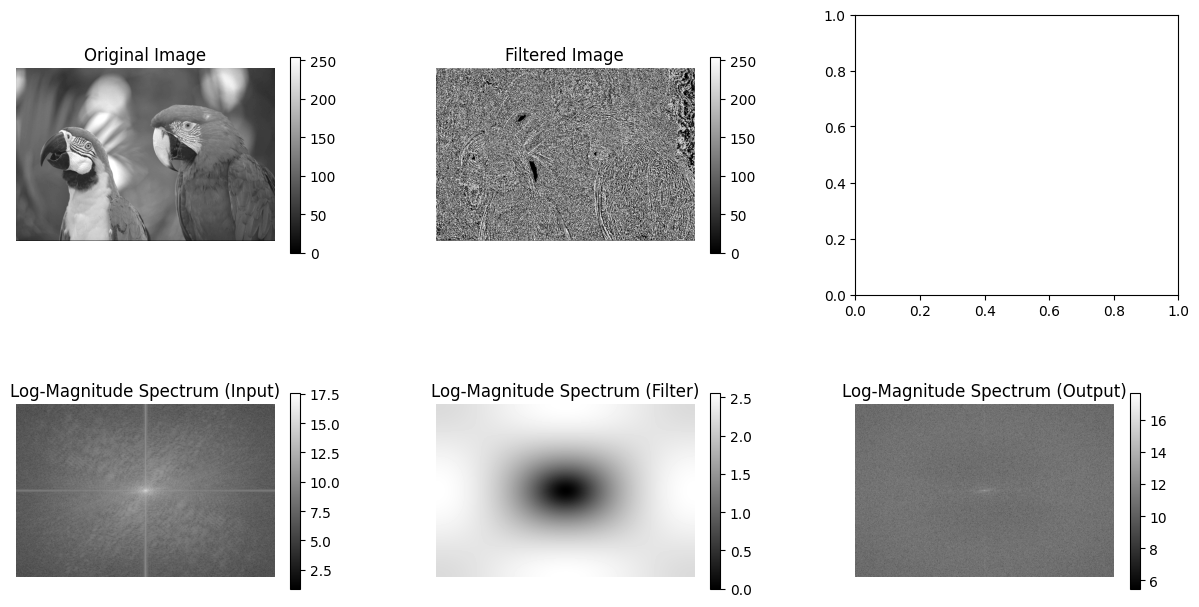

In [8]:
H2 = np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]])
plot_filtering(img, H2)

Spatial Domain Result: Edges and rapid intensity changes in the image have been enhanced and are more pronounced.

Frequency Domain Result: The filter H2 will emphasize high-frequency components in the image's frequency domain, highlighting edges and details.

Reason: The filter H2 has a high pass effect on the image's frequency domain. Therefore, it enhances edges and highlights regions with rapid intensity changes. Actually, H2 is a Laplacian filter, which is often used for edge detection.

#### Filter H3

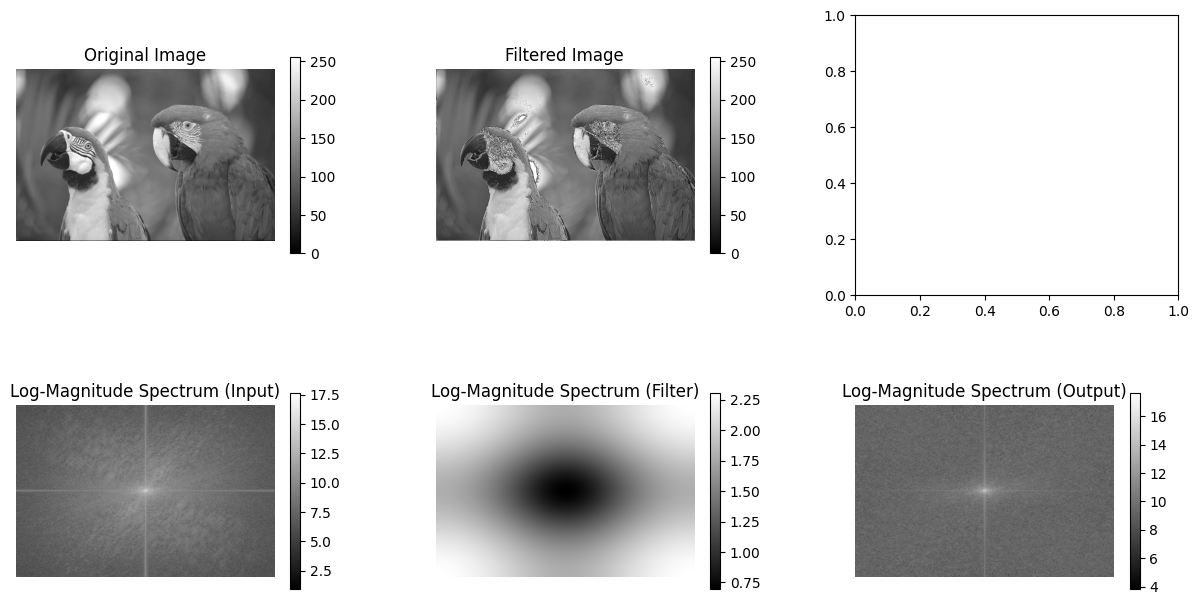

In [9]:
H3 = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
plot_filtering(img, H3)

Spatial Domain Result: Edges in the image have been enhanced, making them appear sharper.

Frequency Domain Result: The filter H3 emphasizes high-frequency components in the image's frequency domain.

Reason: H3 has an high emphasis effect on the image's frequency domain, so it enhances edges and can make them appear sharper.

## Problem 2

### Function `awgn`

In [10]:
def awgn(input_image, sigma_n):

    # Generate Gaussian noise with the same shape as the input image
    noise = np.random.randn(*input_image.shape) * sigma_n

    # Add noise to the input image
    noisy_image = input_image + noise

    # Ensure the pixel values are in the valid range [0, 255]
    noisy_image = np.clip(noisy_image, 0, 255)

    # Round pixel values to integers
    noisy_image = np.round(noisy_image).astype(np.uint8)

    return noisy_image


### Function `guassian_filter`

In [11]:
def gaussian_filter(sigma):

    # Calculate the size of the filter
    m = int(np.ceil(5 * sigma))

    # Ensure that the size is odd for symmetry
    if m % 2 == 0:
        m += 1

    # Create an empty filter
    gauss_filter = np.zeros((m, m))

    # Calculate the center of the filter
    center = m // 2

    # Generate the filter values based on the Gaussian function
    for i in range(m):
        for j in range(m):
            x, y = i - center, j - center
            exponent = -(x**2 + y**2) / (2 * sigma**2)
            gauss_filter[i, j] = np.exp(exponent)

    # Normalize the filter to sum to 1
    gauss_filter /= gauss_filter.sum()

    return gauss_filter


### PSNR

Noise Level (σn): 0.1, Filter Size: 5x5
PSNR (Noisy): 8.48 dB
PSNR (Gaussian Filtered): 12.55 dB
PSNR (Average Filtered): 12.87 dB


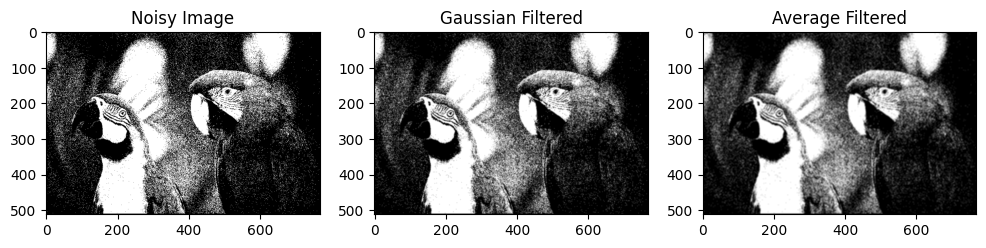

Noise Level (σn): 0.1, Filter Size: 7x7
PSNR (Noisy): 8.48 dB
PSNR (Gaussian Filtered): 12.89 dB
PSNR (Average Filtered): 13.06 dB


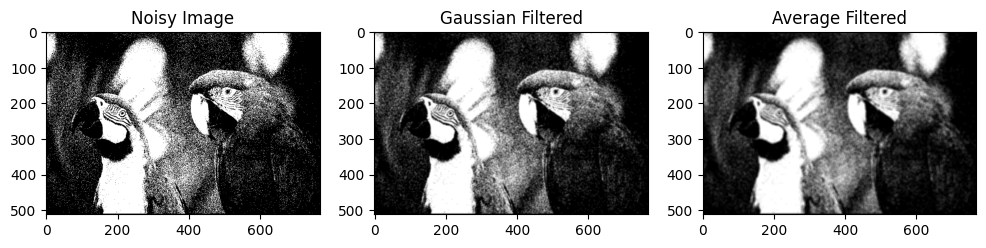

Noise Level (σn): 0.1, Filter Size: 9x9
PSNR (Noisy): 8.48 dB
PSNR (Gaussian Filtered): 13.01 dB
PSNR (Average Filtered): 13.13 dB


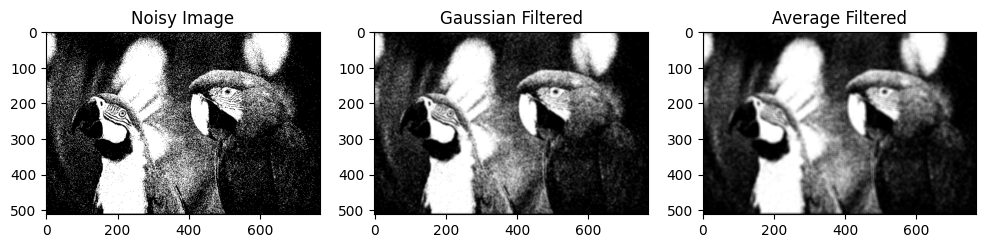

Noise Level (σn): 0.2, Filter Size: 5x5
PSNR (Noisy): 7.56 dB
PSNR (Gaussian Filtered): 15.99 dB
PSNR (Average Filtered): 17.28 dB


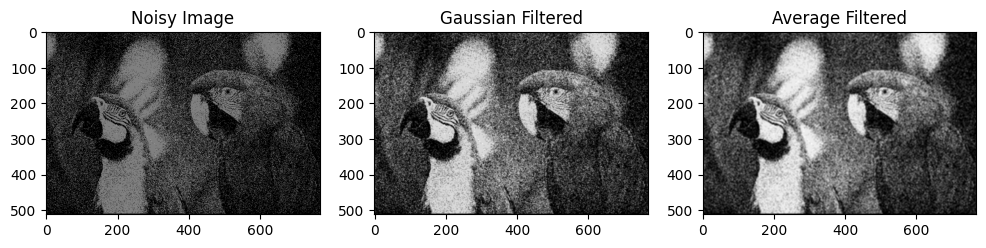

Noise Level (σn): 0.2, Filter Size: 7x7
PSNR (Noisy): 7.56 dB
PSNR (Gaussian Filtered): 17.21 dB
PSNR (Average Filtered): 17.96 dB


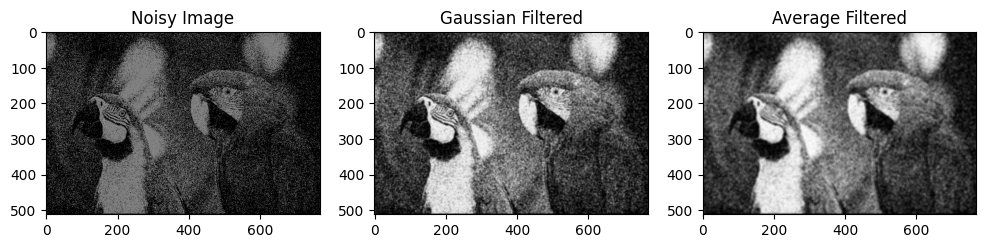

Noise Level (σn): 0.2, Filter Size: 9x9
PSNR (Noisy): 7.57 dB
PSNR (Gaussian Filtered): 17.82 dB
PSNR (Average Filtered): 18.24 dB


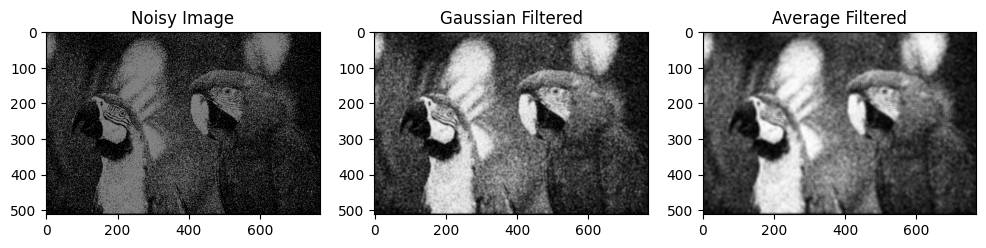

Noise Level (σn): 0.3, Filter Size: 5x5
PSNR (Noisy): 6.90 dB
PSNR (Gaussian Filtered): 17.34 dB
PSNR (Average Filtered): 19.82 dB


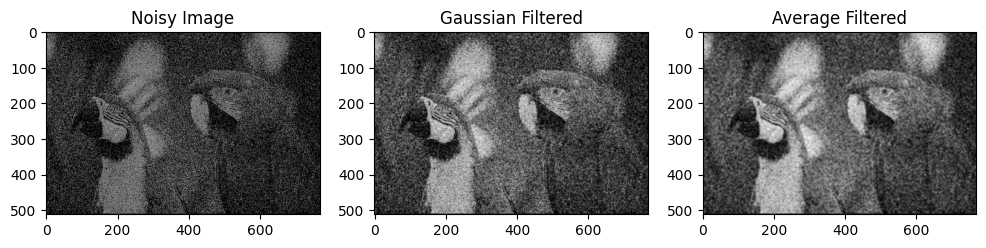

Noise Level (σn): 0.3, Filter Size: 7x7
PSNR (Noisy): 6.90 dB
PSNR (Gaussian Filtered): 19.72 dB
PSNR (Average Filtered): 21.54 dB


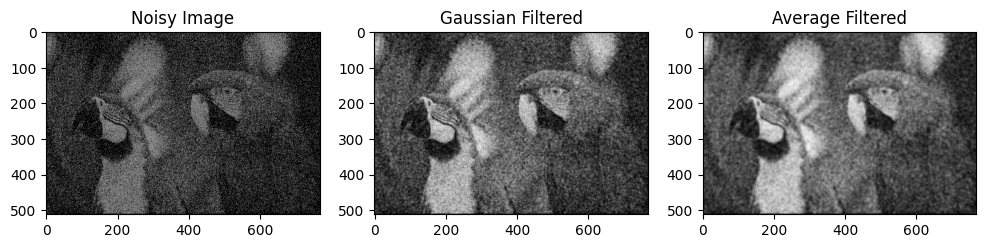

Noise Level (σn): 0.3, Filter Size: 9x9
PSNR (Noisy): 6.89 dB
PSNR (Gaussian Filtered): 21.16 dB
PSNR (Average Filtered): 22.39 dB


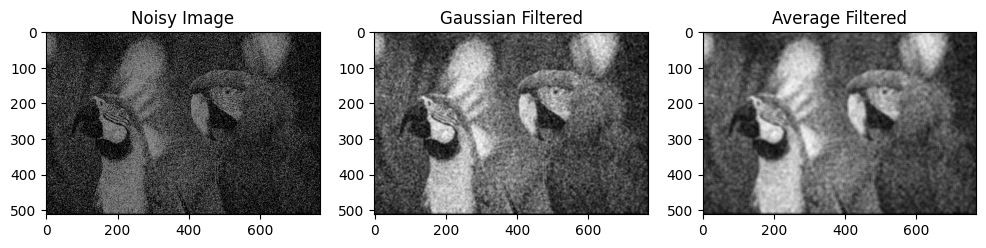

In [12]:
from scipy.signal import convolve2d

def psnr(original, noisy):
    max_intensity = 1.0  # The intensity range of the image
    mse = np.mean((original - noisy) ** 2)
    return -10 * np.log10(mse / (max_intensity ** 2))

# Load the image
image_path = 'color image.png'
original_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE) / 255.0

# Define different noise levels (σn) and filter sizes
noise_levels = [0.1, 0.2, 0.3]
filter_sizes = [5, 7, 9]

for sigma_n in noise_levels:
    for filter_size in filter_sizes:
        # Generate noisy image
        noisy_image = awgn(original_image, sigma_n)

        # Apply Gaussian filter
        sigma = filter_size/5
        gaussian_filtered = convolve2d(noisy_image, gaussian_filter(sigma), mode='same')

        # Apply average filter
        avg_filter = np.ones((filter_size, filter_size)) / (filter_size**2)
        average_filtered = convolve2d(noisy_image, avg_filter, mode='same')

        # Calculate PSNR for noisy and denoised images
        psnr_noisy = psnr(original_image, noisy_image)
        psnr_gaussian = psnr(original_image, gaussian_filtered)
        psnr_average = psnr(original_image, average_filtered)

        # Print PSNR values and visualize the results
        print(f"Noise Level (σn): {sigma_n}, Filter Size: {filter_size}x{filter_size}")
        print(f"PSNR (Noisy): {psnr_noisy:.2f} dB")
        print(f"PSNR (Gaussian Filtered): {psnr_gaussian:.2f} dB")
        print(f"PSNR (Average Filtered): {psnr_average:.2f} dB")

        # Visualize the noisy and denoised images
        plt.figure(figsize=(12, 4))
        plt.subplot(131), plt.imshow(noisy_image, cmap='gray'), plt.title('Noisy Image')
        plt.subplot(132), plt.imshow(gaussian_filtered, cmap='gray'), plt.title('Gaussian Filtered')
        plt.subplot(133), plt.imshow(average_filtered, cmap='gray'), plt.title('Average Filtered')
        plt.show()


The PSNR values give a measure of image quality, where higher values indicate better denoising. Therefore, the average filter denoises better in above different nosie-levels and filter sizes.